In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Turn off warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('/content/lung_cancer_mortality_data_test_v2.csv')
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Female,Slovakia,2016-04-07,Stage IV,2016-04-09,No,Former Smoker,21.2,191,0,0,0,0,Surgery,2017-02-10,0
1,2,50.0,Male,Slovenia,2023-04-22,Stage III,2023-05-05,Yes,Current Smoker,36.4,258,1,0,0,0,Chemotherapy,2024-08-23,0
2,3,65.0,Male,Italy,2023-04-07,Stage II,2023-04-12,Yes,Former Smoker,18.9,174,1,0,1,0,Chemotherapy,2025-03-24,1
3,4,51.0,Male,Latvia,2016-02-07,Stage I,2016-03-08,No,Passive Smoker,38.8,279,1,0,0,0,Combined,2017-03-01,0
4,5,37.0,Female,Spain,2023-12-01,Stage II,2023-12-04,Yes,Former Smoker,37.7,273,0,0,0,0,Combined,2025-07-16,0


In [3]:
df.shape

(1000, 18)

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1000 non-null   int64  
 1   age                          1000 non-null   float64
 2   gender                       1000 non-null   object 
 3   country                      1000 non-null   object 
 4   diagnosis_date               1000 non-null   object 
 5   cancer_stage                 1000 non-null   object 
 6   beginning_of_treatment_date  1000 non-null   object 
 7   family_history               1000 non-null   object 
 8   smoking_status               1000 non-null   object 
 9   bmi                          1000 non-null   float64
 10  cholesterol_level            1000 non-null   int64  
 11  hypertension                 1000 non-null   int64  
 12  asthma                       1000 non-null   int64  
 13  cirrhosis          

[]

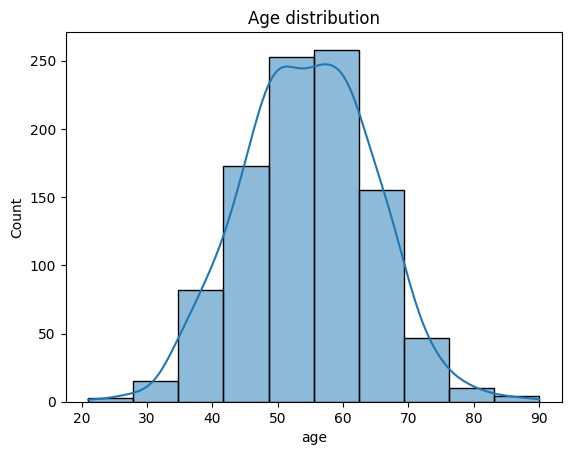

In [7]:
sns.histplot(df['age'] , bins = 10 , kde = True)
plt.title('Age distribution')
plt.plot()

#### Most of the cancer patient are in their 50s, 60s

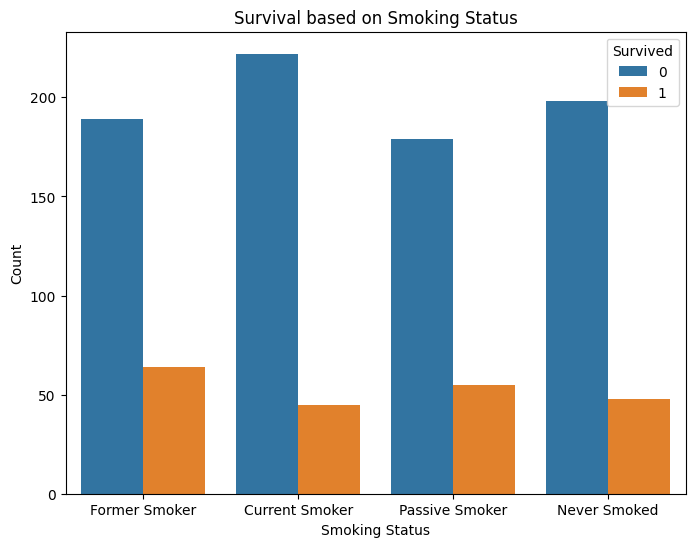

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='smoking_status', hue='survived')
plt.title('Survival based on Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

#### No correaltion of smoking with survival

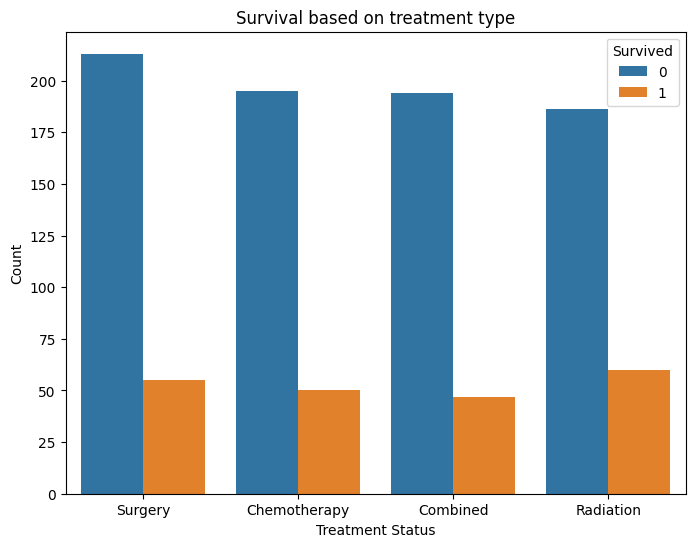

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='treatment_type', hue='survived')
plt.title('Survival based on treatment type')
plt.xlabel('Treatment Status')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

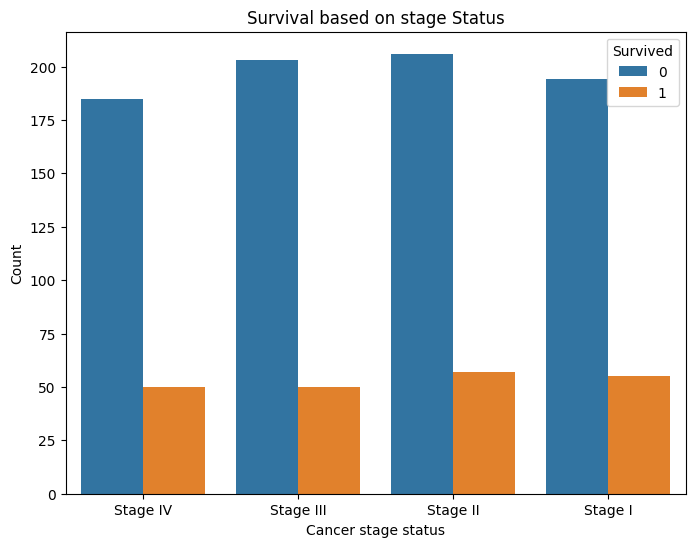

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='cancer_stage', hue='survived')
plt.title('Survival based on stage Status')
plt.xlabel('Cancer stage status')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

In [11]:
df['cancer_stage'].value_counts()

,count
cancer_stage,
Stage II,263
Stage III,253
Stage I,249
Stage IV,235


[]

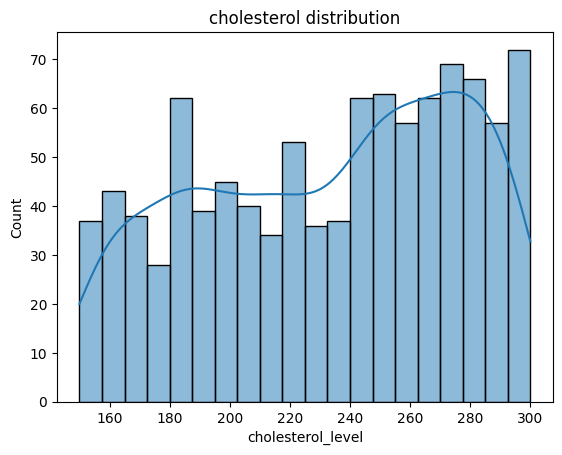

In [12]:
sns.histplot(df['cholesterol_level'] , bins = 20 , kde = True)
plt.title('cholesterol distribution')
plt.plot()

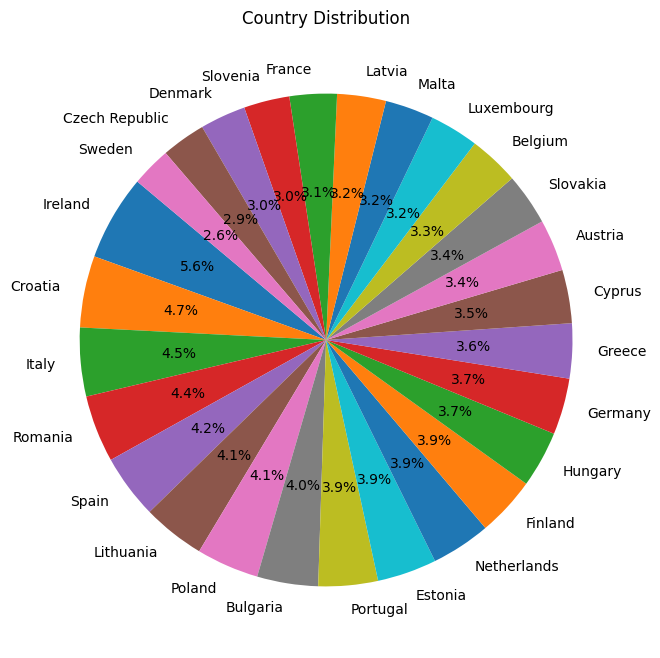

In [13]:
ct = df['country'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(df['country'].value_counts(), labels=ct.index, autopct='%1.1f%%', startangle=140)
plt.title('Country Distribution')
plt.show()

[]

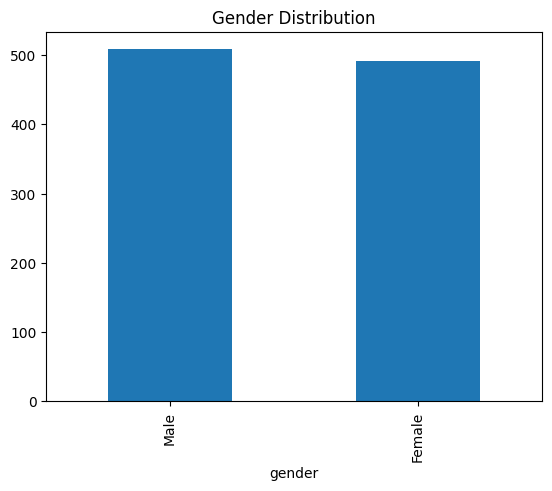

In [14]:
df['gender'].value_counts().plot(kind='bar', title = 'Gender Distribution')
plt.plot()

In [15]:
df = df.drop('id' , axis = 1)

In [16]:
le = LabelEncoder()
for i in df.columns:
    df[i] = le.fit_transform(df[i])

In [17]:
y = df.pop('survived')
X =  df

In [18]:
X_train , X_test , y_train , y_test = train_test_split(X , y  , test_size = 0.2 , random_state = 42 )

In [19]:
rf = RandomForestClassifier()
rf.fit(X_train , y_train)
y_pred = rf.predict(X_test)

In [20]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       158
           1       0.00      0.00      0.00        42

    accuracy                           0.79       200
   macro avg       0.39      0.50      0.44       200
weighted avg       0.62      0.79      0.69       200

